In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from collections import Counter

(-0.5, 799.5, 533.5, -0.5)

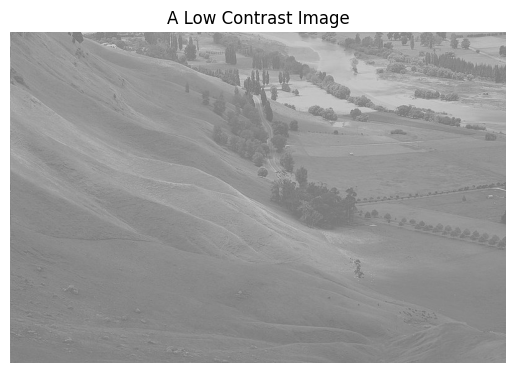

In [3]:
I_degraded = cv2.imread('low_contrast_image.jpeg') / 255
plt.title('A Low Contrast Image')
plt.imshow(I_degraded)
plt.axis('off')

array([0.35294118, 0.41215686, 0.47137255, 0.53058824, 0.58980392,
       0.64901961, 0.70823529, 0.76745098, 0.82666667, 0.88588235,
       0.94509804])

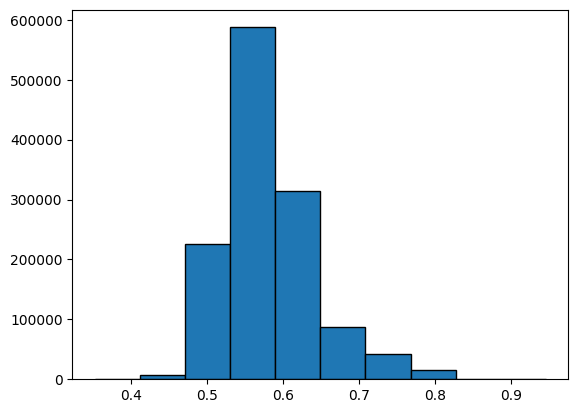

In [8]:
flatten_I_degraded = I_degraded.ravel()
count_I_degraded = np.array(sorted(list(Counter(flatten_I_degraded).items())), dtype=np.float64)
plt.hist(flatten_I_degraded, edgecolor='black')[1] # only 'bins' and the figure will be shown below

In [10]:
# Complete the following function to perform Piecewise Linear Contrast stretching
# That is, implement the map shown in Slide 17 of Lecture 3

# Prototype: piecewise_contrast_stretch(I_gray, r1, r2, s1, s2)
# Assuming both input and output images are normalized between 0 and 1

def outputPixelOf(inputPixel: int, r1: int, r2: int, s1: int, s2: int) -> int:
    if inputPixel < r1:
        return (s1 // r1) * inputPixel
    elif inputPixel <= r2: # the r1 to r2 region lies here
        return ( ((s2 - s1) // (r2 - r1)) * (inputPixel - r1)   ) + s1
    else:        #-------------------------------------------       --
        return ( ((1 - s2) // (1 - r2)) * (inputPixel - r2) ) + s2
                 #---------------------------------------------     --

def piecewise_contrast_stretch(I, r1, r2, s1, s2):
    # Write your code here
    I_stretched = None # replace with appropriate code
    ### BEGIN SOLUTION
    performPiecewiseOn = np.vectorize(outputPixelOf, otypes=[np.float64])
    I_stretched = performPiecewiseOn(I, r1, r2, s1, s2) # but the dtype will be like int32
    return I_stretched # but we will return np.uint8 version
    ### END SOLUTION

float64 float64 float64


(-0.5, 1603.5, 533.5, -0.5)

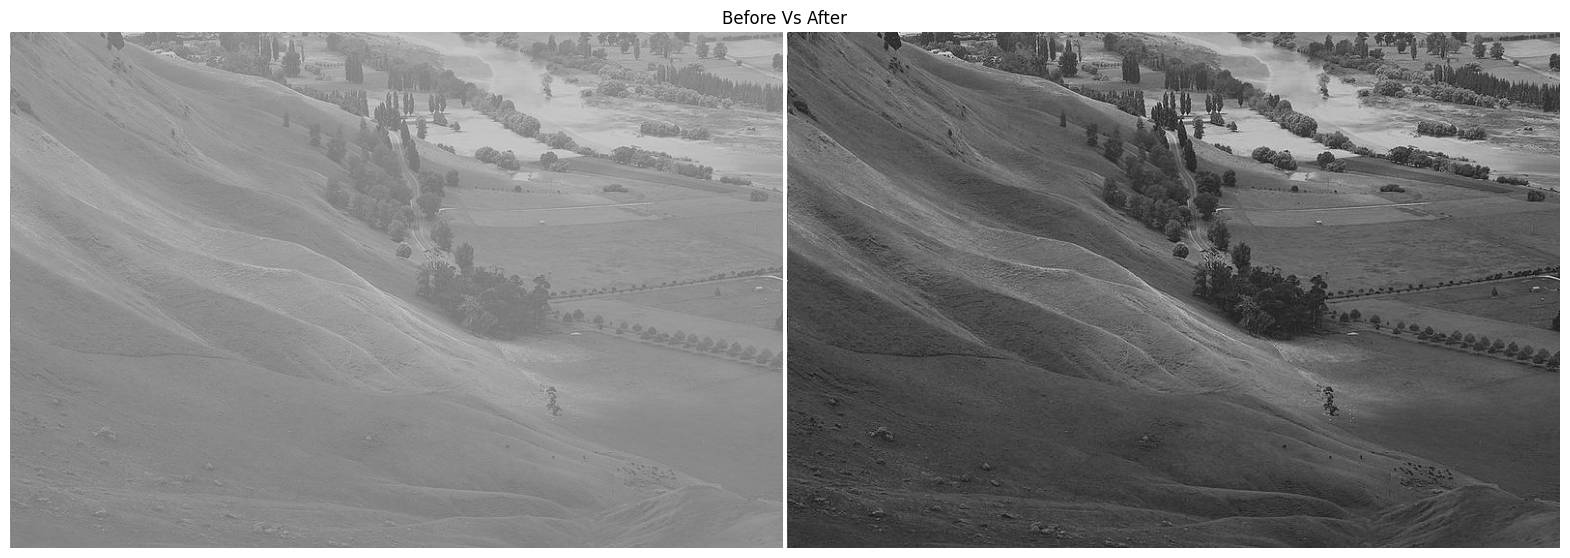

In [11]:
# To test your implementation, contrast strech the degraded image I_degrade
r1 = next(key for (key, count) in count_I_degraded if count > 20)
r2 = next(key for (key, count) in count_I_degraded[::-1] if count > 20)
s1 = 0
s2 = 1

I_stretched = piecewise_contrast_stretch(I_degraded, r1, r2, s1, s2)
# Display the strtched image
### BEGIN SOLUTION
borderLine = np.full((I_degraded.shape[0], 4, 3), 1, dtype=np.float64)
beforeVSafter = np.column_stack((I_degraded, borderLine, I_stretched)) # dtype of beforeVSafter = np.uint8 since the inside arrays dtype are np.uint8
print(I_degraded.dtype, borderLine.dtype, I_stretched.dtype)
plt.figure(figsize=(20, 10))
plt.title("Before Vs After")
plt.imshow(beforeVSafter)
plt.axis('off')
### END SOLUTION